# **Heart Disease Data Analytics Project**

## Objectives

* This goal of this notebook is to analyse health data to understand the relationship and trends of various risk factors such as _diabetes_, _cholesterol_ and _stress_ in relation to heart disease. 

## Inputs

### Data souce
* The primary dataset for this project is heart disease data collected from Kaggle intended for research purposes
https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Section 1 : Design & implement an ETL pipeline

## 1.1 Extract: Importing Libraries, Extracting dataset & Truncating 

* This section involves importing libraries necessary for subsequent data analysis and visualisation tasks.
* The pandas library will be utilised in reading the csv data in order to work with it.
* The dataset will be limited to the first 300 rows to make analysis more manageable.

In [54]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

# using pandas library to read the csv data in
df_full = pd.read_csv('/workspace/heart-disease-data-hackathon-1/jupyter_notebooks/heart_disease.csv')

# truncating dataset
df = df_full.head(300)


In [55]:
# displaying the first 5 rows
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [56]:
# displaying the last 5 rows
df.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
295,49.0,Female,156.0,205.0,Medium,Yes,No,Yes,31.109300,Yes,...,No,None,Low,4.770133,Low,384.0,114.0,2.060411,19.844481,No
296,50.0,Male,127.0,249.0,Low,Yes,Yes,Yes,38.003751,No,...,No,None,Medium,7.589454,High,105.0,138.0,4.506362,10.357272,No
297,18.0,Male,146.0,294.0,Low,Yes,Yes,Yes,32.603794,Yes,...,No,None,Medium,5.699796,Low,123.0,130.0,5.398184,15.424034,No
298,36.0,Female,166.0,159.0,Medium,Yes,Yes,Yes,28.545066,No,...,Yes,Low,Medium,9.573139,Low,247.0,137.0,4.195578,12.310546,No
299,79.0,Male,178.0,193.0,High,No,No,Yes,20.360277,No,...,No,None,High,6.858099,High,308.0,91.0,11.888349,15.723837,No


---

## 1.2 Transform: Data cleaning & Pre-processing

* This section involves handling missing, duplicate and invalid values.
* Checks will be done to ensure each attribute has a data type suitable for further analysis.
* Outlier values will be identified and discarded.

#### 1.2.1 Overview of initial state of dataset

In [57]:
# overview of rows and columns of the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   300 non-null    float64
 1   Gender                300 non-null    object 
 2   Blood Pressure        298 non-null    float64
 3   Cholesterol Level     296 non-null    float64
 4   Exercise Habits       300 non-null    object 
 5   Smoking               299 non-null    object 
 6   Family Heart Disease  299 non-null    object 
 7   Diabetes              299 non-null    object 
 8   BMI                   298 non-null    float64
 9   High Blood Pressure   299 non-null    object 
 10  Low HDL Cholesterol   299 non-null    object 
 11  High LDL Cholesterol  300 non-null    object 
 12  Alcohol Consumption   299 non-null    object 
 13  Stress Level          297 non-null    object 
 14  Sleep Hours           299 non-null    float64
 15  Sugar Consumption     2

In [58]:
# view all columns in data set
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [59]:
# check data types of each column
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

Having cross referenced against the data columns,  each attribute has a valid data type for processing - attributes consist of categorical attributes (object) and numerical attributes (float64) inline with expected values

#### 1.2.2 Identifying missing & automated checking of duplicate data

In [60]:
# Identifying missing values
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          2
Cholesterol Level       4
Exercise Habits         0
Smoking                 1
Family Heart Disease    1
Diabetes                1
BMI                     2
High Blood Pressure     1
Low HDL Cholesterol     1
High LDL Cholesterol    0
Alcohol Consumption     1
Stress Level            3
Sleep Hours             1
Sugar Consumption       2
Triglyceride Level      1
Fasting Blood Sugar     2
CRP Level               3
Homocysteine Level      1
Heart Disease Status    0
dtype: int64

In [61]:
# having identified our missing values we will use the dropna function to remove the rows containing missing values.
df = df.dropna()

# to confirm this action we will check for null values and view the shape of the data to verify this.
df.isnull().sum()
df.shape

(273, 21)

In [62]:
# automated checking for duplicates

def checkDuplicates(df):   
    duplicate_data = df.duplicated().sum()
    return duplicate_data

print(f"There are {duplicate_data} rows with duplicate data.")

There are 0 rows with duplicate data.


Here we have verified that there are no longer rows with missing values or duplicate rows.

#### 1.2.3 Summary Statistics

In [63]:
# In order to get an overview of the data spread we will use summary statistics
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,50.483516,150.432234,224.926740,28.568530,7.016522,248.424908,119.516484,7.712289,12.086196
std,19.058557,17.388404,43.933963,6.201922,1.738665,87.472448,23.603042,4.169992,4.280007
min,18.000000,120.000000,151.000000,18.042332,4.002662,101.000000,80.000000,0.028436,5.040321
25%,34.000000,136.000000,190.000000,23.102313,5.509378,176.000000,97.000000,4.377274,8.438324
50%,51.000000,151.000000,222.000000,28.595191,7.030971,247.000000,121.000000,7.684604,11.780861
75%,68.000000,167.000000,263.000000,33.565671,8.452879,316.000000,139.000000,11.435050,15.192159
max,80.000000,180.000000,300.000000,39.951352,9.996252,399.000000,160.000000,14.938232,19.993292


#### 1.2.4 Identifying outlier values
* We can identify outliers by using visualisation methods such as box plots for numerical attributes and count plots for categorical

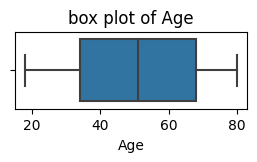

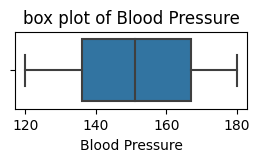

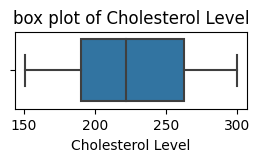

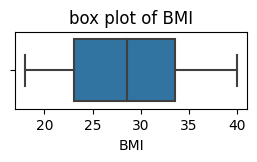

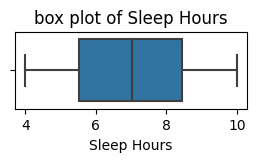

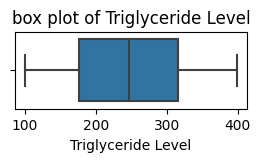

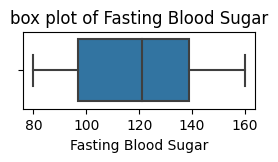

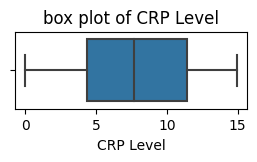

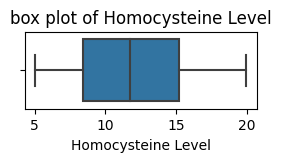

In [68]:
numerical_attributes = df.select_dtypes(include=['number']).columns

for col in numerical_attributes:
    plt.figure(figsize=(3,1))
    sns.boxplot(x=df[col])
    plt.title(f"box plot of {col}")
    plt.show()

#### 1.2.5 ....
...

## 1.3 Load: Storing Processed Data into CSV

* This section involves....

# Section 2: Visualising data using matplotlib, seaborn & plotly